In [1]:
import tensorflow as tf
import sys
import os
from argparse import ArgumentParser, SUPPRESS
import cv2
import numpy as np
import logging as log
from time import time
from openvino.inference_engine import IENetwork
from openvino.inference_engine import IEPlugin,IECore
import PIL
import time

/home/hui/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hui/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hui/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hui/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarnin

In [2]:
tf.enable_eager_execution()

In [3]:
ie = IECore()
ie.add_extension("/home/hui/intel64/Release/lib/libcpu_extension.so", "CPU")
net = IENetwork(model="./saved_model.xml", weights="saved_model.bin")
image = cv2.imread("./demo/db1.jpg",)
image_raw = cv2.resize(cv2.imread("./demo/db1.jpg"),(224,224))
image = cv2.resize(image, (224,224))
image = image.transpose((2, 0, 1))

In [4]:
input_blob = next(iter(net.inputs))
out_blob = next(iter(net.outputs))
net.batch_size = 1

In [10]:
exec_net = ie.load_network(network=net, device_name="CPU")
st = time.time()
res = exec_net.infer(inputs={input_blob: np.expand_dims(image, axis=0)})
ed = time.time()
print(ed-st)

0.023322582244873047


In [8]:
result = list(res.values())

In [ ]:
result[2].shape

In [20]:
scores = result[2]
keypoints = tf.where(tf.greater_equal(scores[0], 0.01))
# scores = tf.gather_nd(scores[0], keypoints)

In [18]:
[cv2.circle(image_raw, (i[0],i[1]), int(1), (255, 0, 0), 2) for i in keypoints.numpy()[..., ::-1]]

[array([[[255, 253, 254],
         [254, 251, 253],
         [255, 251, 254],
         ...,
         [163, 210, 254],
         [159, 204, 248],
         [158, 203, 243]],
 
        [[253, 249, 254],
         [252, 249, 254],
         [255, 249, 255],
         ...,
         [157, 206, 252],
         [156, 203, 247],
         [160, 206, 246]],
 
        [[255, 248, 255],
         [254, 247, 254],
         [255, 251, 255],
         ...,
         [149, 199, 245],
         [157, 204, 248],
         [156, 202, 243]],
 
        ...,
 
        [[ 65,  63,  63],
         [ 63,  63,  63],
         [ 64,  64,  64],
         ...,
         [149, 152, 150],
         [152, 153, 151],
         [149, 150, 148]],
 
        [[ 64,  62,  62],
         [ 63,  63,  63],
         [ 61,  61,  61],
         ...,
         [152, 155, 153],
         [152, 153, 151],
         [154, 155, 153]],
 
        [[ 67,  65,  65],
         [ 62,  62,  62],
         [ 58,  58,  57],
         ...,
         [151, 153, 153],
  

In [ ]:
cv2.imwrite("image.jpg",cv2.resize(image_raw, (1024, 1024)))

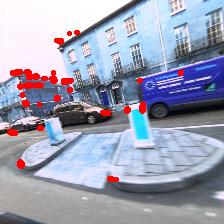

In [19]:
PIL.Image.fromarray(image_raw)

In [ ]:
k = 50
k = tf.minimum(tf.shape(scores)[0], k)
scores, indices = tf.nn.top_k(scores, k)
keypoints = tf.to_int32(tf.gather(
    tf.to_float(keypoints), indices))

In [ ]:
if config['local']['num_keypoints']:
    with tf.name_scope('top_k_keypoints'):
        k = tf.constant(config['local']['num_keypoints'], name='k')
        k = tf.minimum(tf.shape(scores)[0], k)
        scores, indices = tf.nn.top_k(scores, k)
        keypoints = tf.to_int32(tf.gather(
            tf.to_float(keypoints), indices))
keypoints, scores = keypoints[None], scores[None]
keypoints = keypoints[..., ::-1]  # x-y convention
with tf.name_scope('descriptor_sampling'):
    desc = ret['local_descriptor_map']
    scaling = ((tf.cast(tf.shape(desc)[1:3], tf.float64) - 1.)
               / (tf.cast(tf.shape(image)[1:3], tf.float64) - 1.))
    local_descriptors = tf.contrib.resampler.resampler(
        desc, tf.to_float(scaling)[::-1]*tf.to_float(keypoints))
    local_descriptors = tf.nn.l2_normalize(local_descriptors, -1)

In [ ]:
result[2].shape

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(result[2][0])